In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
games_df = pd.read_csv("games.csv")
games_df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0


In [ ]:
games_details_df = pd.read_csv("games_details.csv")
games_details_df.head()

<ipython-input-7-5a8b8d0781fc>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  games_details_df = pd.read_csv("games_details.csv")


,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,...,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,...,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,...,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,...,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0


In [ ]:
games_details_df.shape

(234475, 29)

In [ ]:
games_details_df.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'NICKNAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS',
       'PLUS_MINUS'],
      dtype='object')

In [ ]:
games_df.columns

Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')

In [ ]:
# games_details_df.isna().sum()
# games_df.isna().sum()

In [ ]:
# Join two csv files with game_ID, making sure every games has dates
merged_df = pd.merge(games_df, games_details_df, on='GAME_ID', how='inner')
merged_df

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235402,2005-12-07,20500267,Final,1610612744,1610612756,2005,1610612744,110.0,0.478,0.630,...,2.0,1.0,3.0,0.0,1.0,0.0,0.0,1.0,8.0,12.0
235403,2005-12-07,20500267,Final,1610612744,1610612756,2005,1610612744,110.0,0.478,0.630,...,1.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,9.0,1.0
235404,2005-12-07,20500267,Final,1610612744,1610612756,2005,1610612744,110.0,0.478,0.630,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,3.0,-3.0
235405,2005-12-07,20500267,Final,1610612744,1610612756,2005,1610612744,110.0,0.478,0.630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check missing values
missing_values = merged_df.isna().sum()
#print(missing_values)

In [ ]:
# replace NA/NaN values with 0
merged_w_noNA = merged_df.fillna(0)
merged_w_noNA # No NA/NaN values after this!

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235402,2005-12-07,20500267,Final,1610612744,1610612756,2005,1610612744,110.0,0.478,0.630,...,2.0,1.0,3.0,0.0,1.0,0.0,0.0,1.0,8.0,12.0
235403,2005-12-07,20500267,Final,1610612744,1610612756,2005,1610612744,110.0,0.478,0.630,...,1.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,9.0,1.0
235404,2005-12-07,20500267,Final,1610612744,1610612756,2005,1610612744,110.0,0.478,0.630,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,3.0,-3.0
235405,2005-12-07,20500267,Final,1610612744,1610612756,2005,1610612744,110.0,0.478,0.630,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Q2. How a player's game time affects their indiviaul scoring outcomes?

In [ ]:
# Step 1: Load the Dataset and Prepare Data

# Ensure GAME_DATE_EST is in datetime format
merged_w_noNA['GAME_DATE_EST'] = pd.to_datetime(merged_w_noNA['GAME_DATE_EST'])

In [ ]:
# Step 2: Sort and Calculate OREB Rolling Average

# Sort by PLAYER_ID and GAME_DATE_EST
merged_w_noNA = merged_w_noNA.sort_values(by=['PLAYER_ID', 'GAME_DATE_EST'])

# Calculate OREB rolling average for the last 3 games (ignoring the current game)
merged_w_noNA['OREB_avg_3'] = (
    merged_w_noNA.groupby('PLAYER_ID')['OREB']
    .transform(lambda x: x.shift(1).rolling(3, min_periods=1).mean())
)

In [ ]:
# Step 3: Filter and Select Features

# Ensure MIN and PTS columns are numeric
merged_w_noNA['MIN'] = pd.to_numeric(merged_w_noNA['MIN'], errors='coerce')
merged_w_noNA['PTS'] = pd.to_numeric(merged_w_noNA['PTS'], errors='coerce')

# Filter for players with valid minutes and points
filtered_data = merged_w_noNA[(merged_w_noNA['MIN'] > 0) & (merged_w_noNA['PTS'] > 0)]

# Select predictors (X) and target (y)
X = filtered_data[['MIN', 'OREB_avg_3']]
y = filtered_data['PTS']

In [ ]:
# Step 4: Train-Test Split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
# checking if missing value in X_train
# print(X_train.isnull().sum())

# replacing X_train missing values with 0.
X_train = X_train.fillna(0)

In [ ]:
# Step 5: Train the Linear Regression Model
# Train the model to predict PTS using MIN and OREB_avg_3

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# checking if missing value in X_test
# print(X_test.isnull().sum())

# replacing X_test missing values with 0.
X_test = X_test.fillna(0)

In [ ]:
# Step 6: Make Predictions

y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 22.940609711930534


In [ ]:
# Step 7: Evaluate Feature Importance
# Check how much each predictor (MIN, OREB_avg_3) contributes to predicting PTS

# Display coefficients
coefficients = pd.DataFrame({
    'Predictor': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)


    Predictor  Coefficient
0         MIN     0.403155
1  OREB_avg_3     0.108642


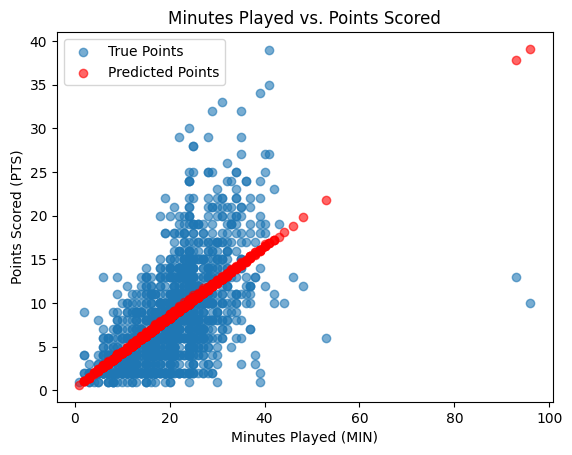

In [ ]:
# Step 8: Visualize the relationship between MIN, OREB_avg_3, and PTS to better interpret results.

# Scatter plot for MIN vs PTS
plt.scatter(X_test['MIN'], y_test, label='True Points', alpha=0.6)
plt.scatter(X_test['MIN'], y_pred, label='Predicted Points', alpha=0.6, color='red')
plt.xlabel('Minutes Played (MIN)')
plt.ylabel('Points Scored (PTS)')
plt.title('Minutes Played vs. Points Scored')
plt.legend()
plt.show()

#  Q7: What determines the likelihood of fouling out?
The goal is to predict whether a player fouled out (binary classification: 1 = fouled out, 0 = did not foul out) based on predictors including OREB raw count from the previous three games.


# Regression DT

In [ ]:
# Step 1: Load the Dataset and Preprocess
# Necessary columns: PLAYER_ID, GAME_DATE_EST, PF (personal fouls), OREB, and MIN

# Ensure GAME_DATE_EST is in datetime format
merged_w_noNA['GAME_DATE_EST'] = pd.to_datetime(merged_w_noNA['GAME_DATE_EST'])

# Create the target variable for fouling out (PF >= 6 means fouled out)
#merged_w_noNA['Fouled_Out'] = (merged_w_noNA['PF'] >= 6).astype(int)

# Create Target for continuous
y = filtered_data['PF']


In [ ]:
y.unique()

array([0., 1., 2., 3., 4., 5., 6.])

In [ ]:
# Step 2: Select Predictors for Decision Tree
# Filter valid data and select predictors for initial modeling. Include all potential predictors for decision tree analysis.

# Filter rows with valid data
filtered_data = merged_w_noNA[(merged_w_noNA['MIN'] > 0)]

# Select predictors and target
X_all = filtered_data[['MIN', 'OREB', 'PTS', 'REB', 'AST', 'STL', 'BLK', 'TO']]  # Example predictors
y = filtered_data['PF']


In [ ]:
# Step 3: Train Decision Tree Model
# Train a decision tree to identify the most important features

#from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


# Split the data into training and testing sets
X_train_q7, X_test_q7, y_train_q7, y_test_q7 = train_test_split(X_all, y, test_size=0.2, random_state=42)

# Check for and handle missing values in the training set (if any)
X_train_q7 = X_train_q7.fillna(0)

# Check for and handle missing values in the testing set (if any)
X_test_q7 = X_test_q7.fillna(0)


# Reminder:
# REB: Total rebounds (OREB + DREB)
# TO: Turnovers (losing possession of the ball)
# AST: Assists (passes leading to a score)
# MIN: Minutes the player was on the court


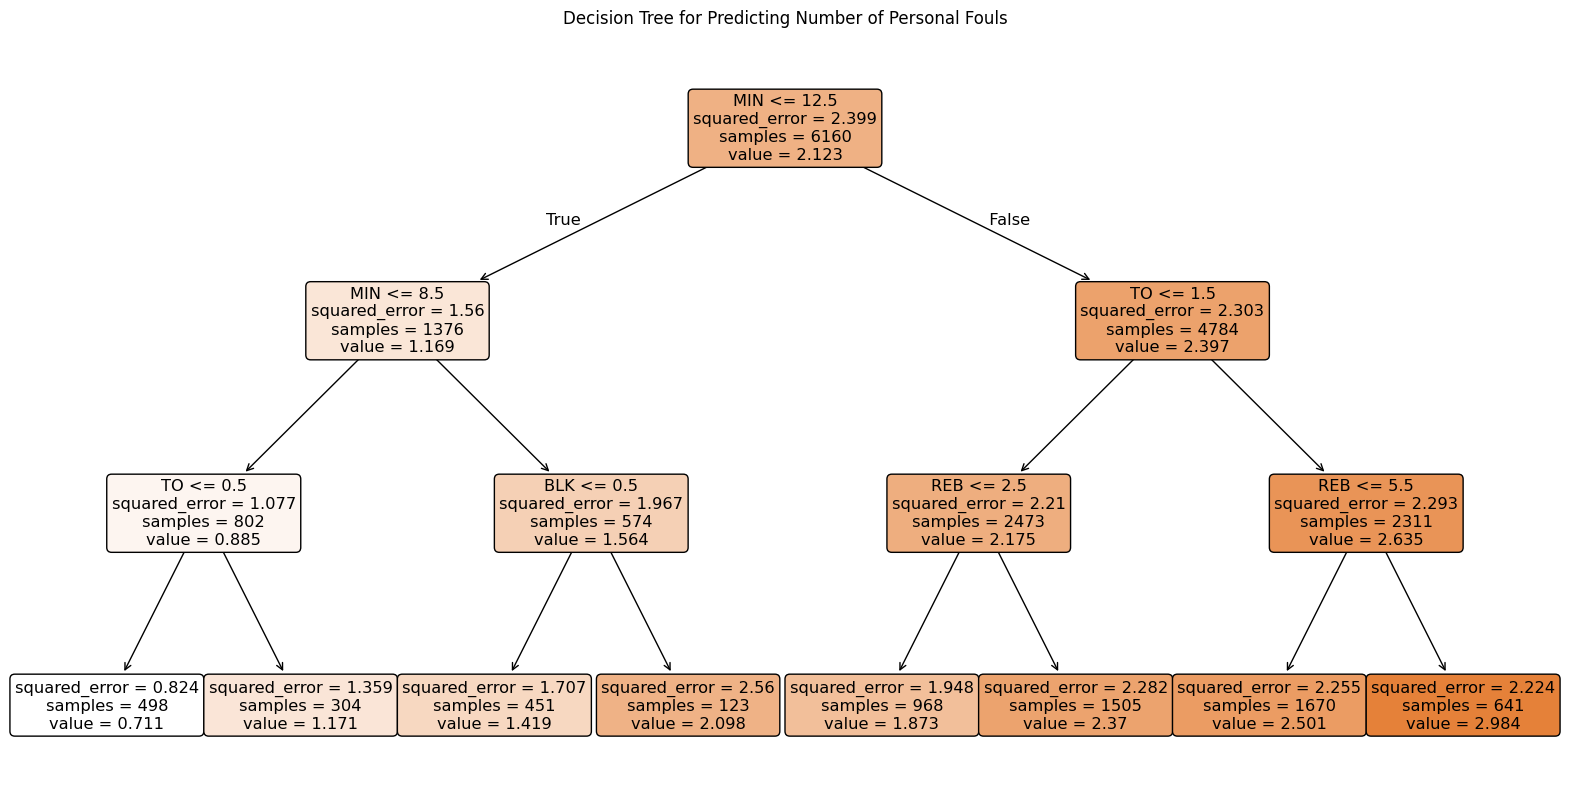

In [ ]:
# prompt: I want to plot the mode below l in decision tree

#from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeRegressor

# Step 4: Train-Test Split (for Decision Tree)
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_all, y, test_size=0.2, random_state=42)

# Step 5: Train the Decision Tree Model
dt_model = DecisionTreeRegressor(random_state=42, max_depth=3)
dt_model.fit(X_train_dt, y_train_dt)


# Step 6: Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X_all.columns, filled=True, rounded=True)
plt.title("Decision Tree for Predicting Number of Personal Fouls")
plt.show()

R-squared Score: 0.15


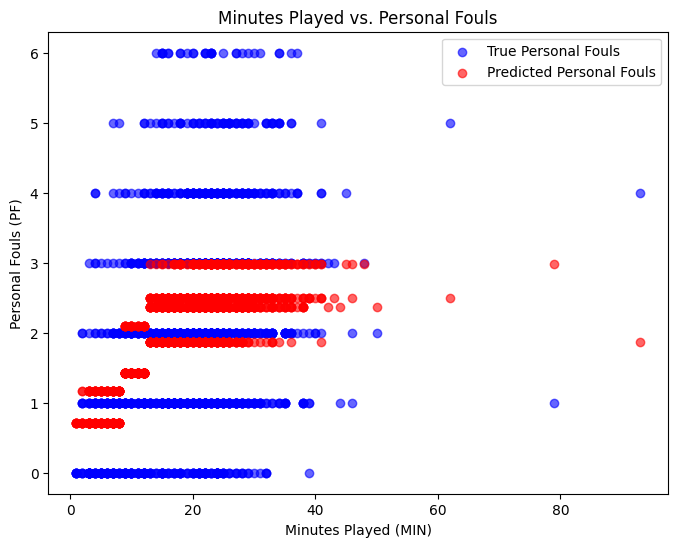

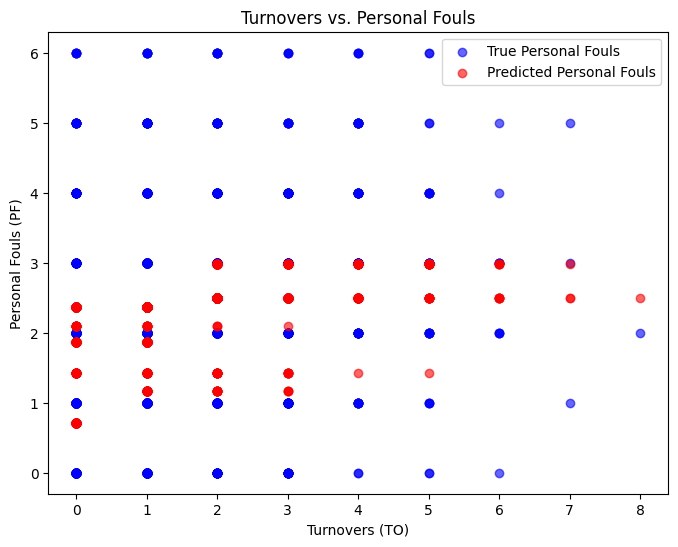

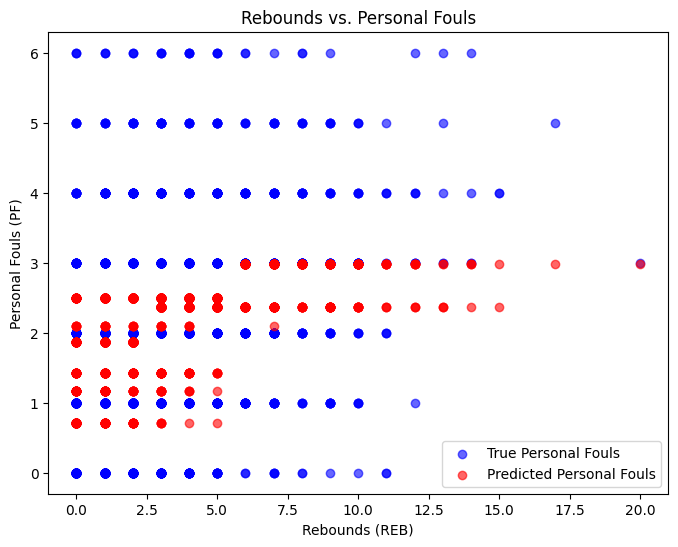

In [ ]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Step 7: Make Predictions
y_pred_dt = dt_model.predict(X_test_dt)

# Step 8: Calculate R-squared Score
r2 = r2_score(y_test_dt, y_pred_dt)
print(f"R-squared Score: {r2:.2f}")

# Visualization 1: MIN vs Personal Fouls
plt.figure(figsize=(8, 6))
plt.scatter(X_test_dt['MIN'], y_test_dt, label='True Personal Fouls', alpha=0.6, color='blue')
plt.scatter(X_test_dt['MIN'], y_pred_dt, label='Predicted Personal Fouls', alpha=0.6, color='red')
plt.xlabel('Minutes Played (MIN)')
plt.ylabel('Personal Fouls (PF)')
plt.title('Minutes Played vs. Personal Fouls')
plt.legend()
plt.show()

# Visualization 2: TO vs Personal Fouls
plt.figure(figsize=(8, 6))
plt.scatter(X_test_dt['TO'], y_test_dt, label='True Personal Fouls', alpha=0.6, color='blue')
plt.scatter(X_test_dt['TO'], y_pred_dt, label='Predicted Personal Fouls', alpha=0.6, color='red')
plt.xlabel('Turnovers (TO)')
plt.ylabel('Personal Fouls (PF)')
plt.title('Turnovers vs. Personal Fouls')
plt.legend()
plt.show()

# Visualization 3: REB vs Personal Fouls
plt.figure(figsize=(8, 6))
plt.scatter(X_test_dt['REB'], y_test_dt, label='True Personal Fouls', alpha=0.6, color='blue')
plt.scatter(X_test_dt['REB'], y_pred_dt, label='Predicted Personal Fouls', alpha=0.6, color='red')
plt.xlabel('Rebounds (REB)')
plt.ylabel('Personal Fouls (PF)')
plt.title('Rebounds vs. Personal Fouls')
plt.legend()
plt.show()



In [ ]:
# prompt: calculate R squared for the decision tree model above

from sklearn.metrics import r2_score

# Assuming 'dt_model' and 'X_test_dt', 'y_test_dt' are defined from the previous code
y_pred_dt = dt_model.predict(X_test_dt)
r2 = r2_score(y_test_dt, y_pred_dt)
print(f"R-squared for the Decision Tree model: {r2}")

R-squared for the Decision Tree model: 0.15096123547388296


In [ ]:
# Extract feature importance
importances = pd.DataFrame({
    'Feature': X_all.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importances)

  Feature  Importance
0     MIN    0.749606
7      TO    0.123813
3     REB    0.107717
6     BLK    0.018865
1    OREB    0.000000
2     PTS    0.000000
4     AST    0.000000
5     STL    0.000000


# Classification DT


In [ ]:
# Select Predictors for Decision Tree for classification (binary)
# Filter valid data and select predictors for initial modeling. Include all potential predictors for decision tree analysis.

# Create a binary target variable for fouling out
filtered_data['Fouled_Out'] = (filtered_data['PF'] >= 6).astype(int)

# Select predictors and the new binary target
X_all = filtered_data[['MIN', 'OREB', 'PTS', 'REB', 'AST', 'STL', 'BLK', 'TO']]  # Predictors
y = filtered_data['Fouled_Out']  # Binary target variable

<ipython-input-33-9dbd3dbd64f0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Fouled_Out'] = (filtered_data['PF'] >= 6).astype(int)


In [ ]:
# Step 3: Select Predictors for Decision Tree
# Filter rows with valid data
filtered_data = merged_w_noNA[(merged_w_noNA['MIN'] > 0)]

# Create a binary target variable for fouling out (1 = Fouled Out, 0 = Not Fouled Out)
filtered_data['Fouled_Out'] = (filtered_data['PF'] >= 6).astype(int)

# Select predictors and the new binary target
X_all = filtered_data[['MIN', 'OREB', 'PTS', 'REB', 'AST', 'STL', 'BLK', 'TO']]  # Predictors
y = filtered_data['Fouled_Out']  # Binary target variable

<ipython-input-34-cf86d8d0b3b2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Fouled_Out'] = (filtered_data['PF'] >= 6).astype(int)


In [ ]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 4: Train-Test Split (for Decision Tree)
# Split the data into training and testing sets
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_all, y, test_size=0.2, random_state=42)

# Check for and handle missing values in the training set (if any)
X_train_dt = X_train_dt.fillna(0)

# Check for and handle missing values in the testing set (if any)
X_test_dt = X_test_dt.fillna(0)

# Step 5: Train the Decision Tree Model
# Train the DecisionTreeClassifier for binary target
dt_model = DecisionTreeClassifier(random_state=42, max_depth=3)
dt_model.fit(X_train_dt, y_train_dt)

# Step 6: Make Predictions
# Use the trained model to predict the target variable for the test set
y_pred_dt = dt_model.predict(X_test_dt)

# Step 7: Calculate Metrics
accuracy = accuracy_score(y_test_dt, y_pred_dt)
precision = precision_score(y_test_dt, y_pred_dt)
recall = recall_score(y_test_dt, y_pred_dt)
f1 = f1_score(y_test_dt, y_pred_dt)

# Step 8: Display Results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Step 9: Confusion Matrix
conf_matrix = confusion_matrix(y_test_dt, y_pred_dt)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.98
Precision: 0.00
Recall: 0.00
F1-Score: 0.00
Confusion Matrix:
[[1509    1]
 [  31    0]]


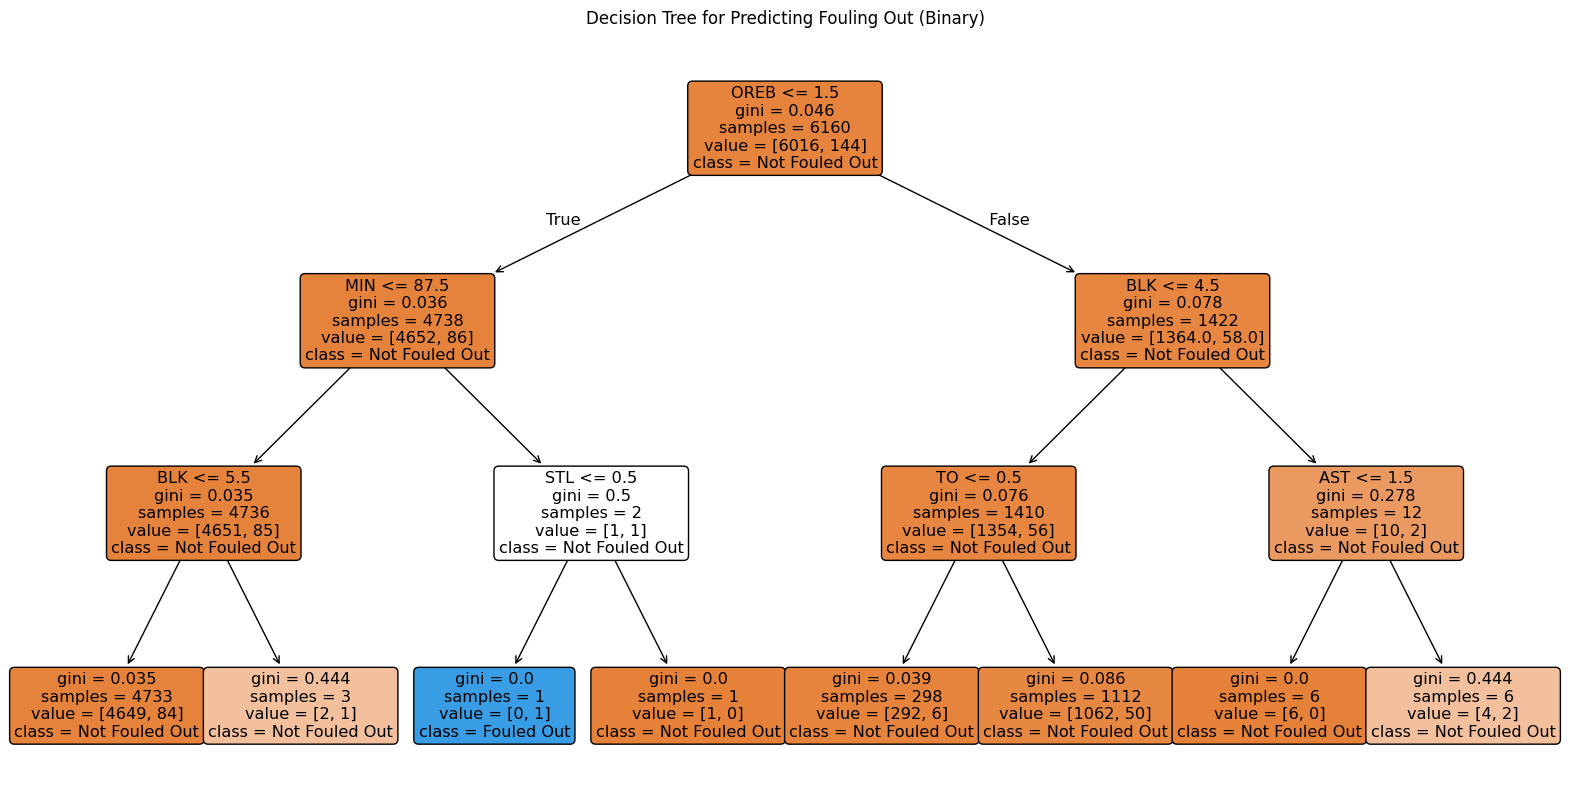

In [ ]:
# Step 6: Visualize the Decision Tree
# Visualize the decision tree for binary classification
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=X_all.columns,
    class_names=['Not Fouled Out', 'Fouled Out'],
    filled=True,
    rounded=True
)
plt.title("Decision Tree for Predicting Fouling Out (Binary)")
plt.show()

In [ ]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Step 7: Make Predictions
y_pred_dt = dt_model.predict(X_test_dt)

# Step 8: Calculate R-squared Score
r2 = r2_score(y_test_dt, y_pred_dt)
print(f"R-squared Score: {r2:.2f}")

# Visualization 1: MIN vs Personal Fouls
plt.figure(figsize=(8, 6))
plt.scatter(X_test_dt['MIN'], y_test_dt, label='True Personal Fouls', alpha=0.6, color='blue')
plt.scatter(X_test_dt['MIN'], y_pred_dt, label='Predicted Personal Fouls', alpha=0.6, color='red')
plt.xlabel('Minutes Played (MIN)')
plt.ylabel('Personal Fouls (PF)')
plt.title('Minutes Played vs. Personal Fouls')
plt.legend()
plt.show()

# Visualization 2: TO vs Personal Fouls
plt.figure(figsize=(8, 6))
plt.scatter(X_test_dt['TO'], y_test_dt, label='True Personal Fouls', alpha=0.6, color='blue')
plt.scatter(X_test_dt['TO'], y_pred_dt, label='Predicted Personal Fouls', alpha=0.6, color='red')
plt.xlabel('Turnovers (TO)')
plt.ylabel('Personal Fouls (PF)')
plt.title('Turnovers vs. Personal Fouls')
plt.legend()
plt.show()

# Visualization 3: REB vs Personal Fouls
plt.figure(figsize=(8, 6))
plt.scatter(X_test_dt['REB'], y_test_dt, label='True Personal Fouls', alpha=0.6, color='blue')
plt.scatter(X_test_dt['REB'], y_pred_dt, label='Predicted Personal Fouls', alpha=0.6, color='red')
plt.xlabel('Rebounds (REB)')
plt.ylabel('Personal Fouls (PF)')
plt.title('Rebounds vs. Personal Fouls')
plt.legend()
plt.show()


# Classification DT with balanced weight

In [ ]:
# Select Predictors for Decision Tree for classification (binary)
# Filter valid data and select predictors for initial modeling. Include all potential predictors for decision tree analysis.

# Create a binary target variable for fouling out
filtered_data['Fouled_Out'] = (filtered_data['PF'] >= 6).astype(int)

# Select predictors and the new binary target
X_all = filtered_data[['MIN', 'OREB', 'PTS', 'REB', 'AST', 'STL', 'BLK', 'TO']]  # Predictors
y = filtered_data['Fouled_Out']  # Binary target variable

In [ ]:
# Step 3: Select Predictors for Decision Tree
# Filter rows with valid data
filtered_data = merged_w_noNA[(merged_w_noNA['MIN'] > 0)]

# Create a binary target variable for fouling out (1 = Fouled Out, 0 = Not Fouled Out)
filtered_data['Fouled_Out'] = (filtered_data['PF'] >= 6).astype(int)

# Select predictors and the new binary target
X_all = filtered_data[['MIN', 'OREB', 'PTS', 'REB', 'AST', 'STL', 'BLK', 'TO']]  # Predictors
y = filtered_data['Fouled_Out']  # Binary target variable

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 4: Train-Test Split (for Decision Tree)
# Split the data into training and testing sets
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_all, y, test_size=0.2, random_state=42)

# Check for and handle missing values in the training set (if any)
X_train_dt = X_train_dt.fillna(0)

# Check for and handle missing values in the testing set (if any)
X_test_dt = X_test_dt.fillna(0)

# Step 5: Train the Decision Tree Model
# Train the DecisionTreeClassifier for binary target
dt_model = DecisionTreeClassifier(random_state=42, max_depth=3,class_weight='balanced')
dt_model.fit(X_train_dt, y_train_dt)

In [ ]:
# Step 6: Visualize the Decision Tree
# Visualize the decision tree for binary classification
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=X_all.columns,
    class_names=['Not Fouled Out', 'Fouled Out'],
    filled=True,
    rounded=True
)
plt.title("Decision Tree for Predicting Fouling Out (Binary)")
plt.show()

In [ ]:
# Step 5: Incorporate Top Features into Logistic Regression
# From the importances DataFrame, select the top 2 most important features and combine them with OREB_avg_3!

# Select top 2 important features
top_features = importances['Feature'].iloc[:2].tolist()

# Combine top features with OREB
final_features = top_features + ['OREB']

# Prepare the final predictors
X_final = filtered_data[final_features]


In [ ]:
# Step 6: Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)


In [ ]:
# checking if missing value in X_train & X_test
# print(X_train.isnull().sum())

# replacing X_train & X_test missing values with 0.
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [ ]:
# Step 7: Train Logistic Regression Model

from sklearn.linear_model import LogisticRegression

logistic_clf = LogisticRegression()
logistic_clf.fit(X_train, y_train)


In [ ]:
# prompt: Calculate R squared score for the logistic regression model above.

y_pred_lr = logistic_clf.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"R-squared for the Logistic Regression model: {r2_lr}")

In [ ]:
# Step 8: Evaluate Logistic Model
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions
y_pred = logistic_clf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred)+ '\n')

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Display coefficients
coefficients = pd.DataFrame({
    'Predictor': X_final.columns,
    'Coefficient': logistic_clf.coef_[0]
})
print(coefficients)


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred , labels = logistic_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logistic_clf.classes_)
disp.plot(cmap = 'flare')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Visualization Way 1: Confusion Matrix Heatmap
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Foul Out', 'Fouled Out'], yticklabels=['No Foul Out', 'Fouled Out'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualization Way 2: Scatter Plot of Predictions and Features
# Scatter plot with trend line for OREB
plt.figure(figsize=(8, 6))
sns.regplot(x=X_test['OREB'], y=y_test, label='True Values (Trend)', scatter_kws={'color': 'blue'}, line_kws={'color': 'blue'})
sns.regplot(x=X_test['OREB'], y=y_pred, label='Predicted Values (Trend)', scatter_kws={'color': 'red'}, line_kws={'color': 'red'})
plt.xlabel('OREB (Offensive Rebounds)')
plt.ylabel('Fouled Out (1 = Yes, 0 = No)')
plt.title('OREB vs Fouled Out (True vs Predicted with Trend Lines)')
plt.legend()
plt.show()

# Repeat scatter plot for the other top feature
# Scatter plot with trend line for MIN
plt.figure(figsize=(8, 6))
sns.regplot(x=X_test['MIN'], y=y_test, label='True Values (Trend)', scatter_kws={'color': 'blue'}, line_kws={'color': 'blue'})
sns.regplot(x=X_test['MIN'], y=y_pred, label='Predicted Values (Trend)', scatter_kws={'color': 'red'}, line_kws={'color': 'red'})
plt.xlabel('MIN (Minutes Played)')
plt.ylabel('Fouled Out (1 = Yes, 0 = No)')
plt.title('MIN vs Fouled Out (True vs Predicted with Trend Lines)')
plt.legend()
plt.show()

# Visualization Way 3: Bar Plot for Feature Coefficients
coefficients = pd.DataFrame({
    'Feature': X_final.columns,
    'Coefficient': logistic_clf.coef_[0]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')
plt.title('Feature Importance in Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()
